In [1]:
import pandas
import numpy
from RexR import *
import _helpers
Rocket = RexR(datalocation = None, #'_data/genomic_data/data.pkl', 
              seed = 3123, 
              debug = False, 
              write_out=True,
              set_name = 'ALL_10') # data to read in ALL_10, or MELA
Rocket.load_probeset_data();

%matplotlib inline
%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


++++++++++++++++++++++++++++++ Firing up RexR! ++++++++++++++++++++++++++++++


# Classification

In [46]:
METHOD_LIST = ['RF','XGB', 'LGBM', 'ExtraTrees','SVM', 'LR', 'MLNN', 'RVM', 'DNN', 'CNN'] #, 'NaiveBayes','MLNN', 'XGB'] # 
Runs = []
nruns = 2
SCALER = "minmax" # minmax, standard, normaliser
GROUPING = "mean"
FEAT_SELECTOR = "low_variance" # "low_variance"
SELECTOR_METHOD = "FDR" # mannwhitney, FDR
SELECTOR_ALPHA = 0.025 # see this as the maximum p-value to classify 
DIM_TYPE =  None #"LDA", "PCA", "PLS" 
DIM_NUM = 1000
Results = None
ACC = pd.DataFrame()
Rocket.VIZ = False
Rocket.DATA_merged_processed = None
PREPROC_DICT = {"patient_grouping": GROUPING, "bias_removal": False, "noise": True}
FSELECT_DICT = {"type": FEAT_SELECTOR, "pvalue": SELECTOR_ALPHA, "method": SELECTOR_METHOD}
DIMRED_DICT = {"type": DIM_TYPE, "n_comp": DIM_NUM}

In [47]:
Rocket.X_GENOME = None
Rocket.Y_CLASS = None
Rocket.PREP_HASH = None

RUNS, MODELS, ACC = Rocket.run_classification(method_list = METHOD_LIST, 
                          num_run = nruns,
                          pipeline = {"scaler": {"type": SCALER},
                                      "pre_processing": PREPROC_DICT,
                                      "feature_selection": FSELECT_DICT, # mannwhitney         
                                      "dim_reduction": DIMRED_DICT},
                          parameters = {}, 
                          features = 'genomic')

+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Prepping data, this may take a while..
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  Grouping probesets
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  Selecting features using a low_variance filter
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  Kept 78 of 54613 features using FDR with p = 0.025
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (58, 78) and class vector (58,)
MODEL: RF accuracy:  0.7931034482758621 +/-: 0.030339062443699775
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing featu

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

MODEL: XGB accuracy:  0.7413793103448276 +/-: 0.006783050481029083
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (58, 78) and class vector (58,)


/usr/local/lib/python3.5/dist-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/usr/local/lib/python3.5/dist-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored

MODEL: LGBM accuracy:  0.8275862068965517 +/-: 0.0231731704680575
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (58, 78) and class vector (58,)
MODEL: ET accuracy:  0.8103448275862069 +/-: 0.03286581630814686
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (58, 78) and class vector (58,)
MODEL: SVM accuracy:  0.8793103448275861 +/-: 0.007638813821929159
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIF

/home/bramiozo/DEV/GIT/RexR/rvm.py:289: RuntimeWarning: invalid value encountered in log
  change = np.abs(np.log(newAlpha) - np.log(self.Alpha[j]))


 137 - L= 1.0745363 - Gamma=39.3903287 (M=  41) - s=0.0100
 138 - L= 1.0745363 - Gamma=39.3903259 (M=  41) - s=0.0100
 139 - L= 1.0745363 - Gamma=39.3904506 (M=  41) - s=0.0100
 140 - L= 1.0745363 - Gamma=39.3904607 (M=  41) - s=0.0100
 141 - L= 1.0745363 - Gamma=39.3904640 (M=  41) - s=0.0100
 142 - L= 1.0745363 - Gamma=39.3904631 (M=  41) - s=0.0100
 143 - L= 1.0745363 - Gamma=39.3904686 (M=  41) - s=0.0100
 144 - L= 1.0745363 - Gamma=39.3904686 (M=  41) - s=0.0100
Stopping at iteration 144 - max_delta_ml=2.3286951638512967e-07
L=1.0745363221870379 - Gamma=39.39046858468963 (M=41) - s=0.01
Initial alpha = [[0.07497704]]
   1 - L=-577.6855769 - Gamma= 1.9999130 (M=   2) - s=0.0100
   2 - L=-494.3435539 - Gamma= 2.9997521 (M=   3) - s=0.0100
   3 - L=-442.5026611 - Gamma= 3.9994503 (M=   4) - s=0.0100
   4 - L=-398.7133525 - Gamma= 4.9989683 (M=   5) - s=0.0100
   5 - L=-341.1181294 - Gamma= 5.9984319 (M=   6) - s=0.0100
   6 - L=-310.9214620 - Gamma= 6.9979652 (M=   7) - s=0.0100
   7

  99 - L= 1.1476472 - Gamma=40.9321683 (M=  43) - s=0.0100
 100 - L= 1.1566635 - Gamma=40.5043060 (M=  42) - s=0.0100
 101 - L= 1.1602546 - Gamma=40.5086217 (M=  42) - s=0.0100
 102 - L= 1.1634852 - Gamma=40.5268074 (M=  42) - s=0.0100
 103 - L= 1.1669122 - Gamma=40.1069849 (M=  42) - s=0.0100
 104 - L= 1.1696466 - Gamma=40.1054551 (M=  42) - s=0.0100
 105 - L= 1.1722910 - Gamma=40.0933879 (M=  42) - s=0.0100
 106 - L= 1.1750253 - Gamma=40.0242337 (M=  42) - s=0.0100
 107 - L= 1.1753933 - Gamma=39.8778989 (M=  41) - s=0.0100
 108 - L= 1.1797694 - Gamma=39.2899556 (M=  41) - s=0.0100
 109 - L= 1.1828450 - Gamma=39.3206809 (M=  41) - s=0.0100
 110 - L= 1.1851116 - Gamma=39.3211587 (M=  41) - s=0.0100
 111 - L= 1.1851534 - Gamma=39.2517727 (M=  40) - s=0.0100
 112 - L= 1.1869633 - Gamma=39.2351816 (M=  40) - s=0.0100
 113 - L= 1.1888759 - Gamma=39.3181411 (M=  40) - s=0.0100
 114 - L= 1.1903732 - Gamma=39.3151197 (M=  40) - s=0.0100
 115 - L= 1.1918642 - Gamma=39.3203391 (M=  40) - s=0.01

  32 - L=-51.6271000 - Gamma=32.9372423 (M=  33) - s=0.0100
  33 - L=-48.9623969 - Gamma=33.9307030 (M=  34) - s=0.0100
  34 - L=-45.9828103 - Gamma=34.9233740 (M=  35) - s=0.0100
  35 - L=-42.9019260 - Gamma=35.9092382 (M=  36) - s=0.0100
  36 - L=-42.8521850 - Gamma=34.9245395 (M=  35) - s=0.0100
  37 - L=-39.5034979 - Gamma=35.9182948 (M=  36) - s=0.0100
  38 - L=-37.3402960 - Gamma=36.9102733 (M=  37) - s=0.0100
  39 - L=-34.2847518 - Gamma=37.8982318 (M=  38) - s=0.0100
  40 - L=-32.3688420 - Gamma=38.8766215 (M=  39) - s=0.0100
  41 - L=-32.3274694 - Gamma=37.8917343 (M=  38) - s=0.0100
  42 - L=-30.7600306 - Gamma=38.8752122 (M=  39) - s=0.0100
  43 - L=-29.2509904 - Gamma=39.8615112 (M=  40) - s=0.0100
  44 - L=-27.0350627 - Gamma=40.8321262 (M=  41) - s=0.0100
  45 - L=-26.9981420 - Gamma=39.8478904 (M=  40) - s=0.0100
  46 - L=-23.8525602 - Gamma=40.8194948 (M=  41) - s=0.0100
  47 - L=-20.4007643 - Gamma=41.7976424 (M=  42) - s=0.0100
  48 - L=-20.3487401 - Gamma=40.8296317 

++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (58, 78) and class vector (58,)
Train on 46 samples, validate on 12 samples
Epoch 1/5
46/46 [==============================] - 0s - loss: 0.6928 - acc: 0.6087 - val_loss: 0.6651 - val_acc: 0.9167
Epoch 2/5
46/46 [==============================] - 0s - loss: 0.6382 - acc: 0.7391 - val_loss: 0.6659 - val_acc: 0.5833
Epoch 3/5
46/46 [==============================] - 0s - loss: 0.5948 - acc: 0.6739 - val_loss: 0.3829 - val_acc: 0.9167
Epoch 4/5
46/46 [==============================] - 0s - loss: 0.4896 - acc: 0.8043 - val_loss: 0.1808 - val_acc: 1.0000
Epoch 5/5
46/46 [==============================] - 0s - loss: 0.3625 - acc: 0.8261 - val_loss: 1.3396 - val_acc: 0.4167
Train on 46 samples, validate on 12 samples
Epoch 1/5
46/46 [==============================] - 0s - loss: 0.6757 - acc: 0.8043 - val_loss: 0.4222 - val_acc: 0.7500
Epoc

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

MODEL: XGB accuracy:  0.7413793103448276 +/-: 0.01030969624905416
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (58, 78) and class vector (58,)


/usr/local/lib/python3.5/dist-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/usr/local/lib/python3.5/dist-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored

MODEL: LGBM accuracy:  0.8448275862068966 +/-: 0.016020790545166287
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (58, 78) and class vector (58,)
MODEL: ET accuracy:  0.7931034482758621 +/-: 0.030339062443699775
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (58, 78) and class vector (58,)
MODEL: SVM accuracy:  0.896551724137931 +/-: 0.004319352862753574
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASS

/home/bramiozo/DEV/GIT/RexR/rvm.py:289: RuntimeWarning: invalid value encountered in log
  change = np.abs(np.log(newAlpha) - np.log(self.Alpha[j]))


 169 - L= 1.4059547 - Gamma=36.0664892 (M=  39) - s=0.0100
 170 - L= 1.4059547 - Gamma=36.0665551 (M=  39) - s=0.0100
 171 - L= 1.4059547 - Gamma=36.0650907 (M=  39) - s=0.0100
 172 - L= 1.4059547 - Gamma=36.0651160 (M=  39) - s=0.0100
 173 - L= 1.4059547 - Gamma=36.0651277 (M=  39) - s=0.0100
 174 - L= 1.4059548 - Gamma=36.0651224 (M=  39) - s=0.0100
 175 - L= 1.4059548 - Gamma=36.0651216 (M=  39) - s=0.0100
 176 - L= 1.4059548 - Gamma=36.0652069 (M=  39) - s=0.0100
 177 - L= 1.4059548 - Gamma=36.0643389 (M=  39) - s=0.0100
 178 - L= 1.4059548 - Gamma=36.0648226 (M=  39) - s=0.0100
 179 - L= 1.4059548 - Gamma=36.0647860 (M=  39) - s=0.0100
 180 - L= 1.4059548 - Gamma=36.0635401 (M=  39) - s=0.0100
 181 - L= 1.4059549 - Gamma=36.0635439 (M=  39) - s=0.0100
 182 - L= 1.4059549 - Gamma=36.0635484 (M=  39) - s=0.0100
 183 - L= 1.4059549 - Gamma=36.0635864 (M=  39) - s=0.0100
 184 - L= 1.4059549 - Gamma=36.0635859 (M=  39) - s=0.0100
 185 - L= 1.4059549 - Gamma=36.0635794 (M=  39) - s=0.01

 167 - L= 1.2827648 - Gamma=39.0914457 (M=  42) - s=0.0100
 168 - L= 1.2833114 - Gamma=39.0838521 (M=  42) - s=0.0100
 169 - L= 1.2839129 - Gamma=39.1709283 (M=  42) - s=0.0100
 170 - L= 1.2844512 - Gamma=39.1665053 (M=  42) - s=0.0100
 171 - L= 1.2851331 - Gamma=38.9334313 (M=  42) - s=0.0100
 172 - L= 1.2867855 - Gamma=38.8497807 (M=  42) - s=0.0100
 173 - L= 1.2868961 - Gamma=38.8284344 (M=  41) - s=0.0100
 174 - L= 1.2875597 - Gamma=38.8031238 (M=  41) - s=0.0100
 175 - L= 1.2882789 - Gamma=38.8656630 (M=  41) - s=0.0100
 176 - L= 1.2888184 - Gamma=38.8767331 (M=  41) - s=0.0100
 177 - L= 1.2893432 - Gamma=38.8795014 (M=  41) - s=0.0100
 178 - L= 1.2899224 - Gamma=38.7440144 (M=  41) - s=0.0100
 179 - L= 1.2904393 - Gamma=38.7267256 (M=  41) - s=0.0100
 180 - L= 1.2909812 - Gamma=38.6489824 (M=  41) - s=0.0100
 181 - L= 1.2915550 - Gamma=38.6849474 (M=  41) - s=0.0100
 182 - L= 1.2920846 - Gamma=38.6988354 (M=  41) - s=0.0100
 183 - L= 1.2925958 - Gamma=38.6985609 (M=  41) - s=0.01

 177 - L= 0.7823287 - Gamma=50.7541232 (M=  53) - s=0.0100
 178 - L= 0.7824265 - Gamma=50.7469445 (M=  53) - s=0.0100
 179 - L= 0.7825083 - Gamma=50.7577332 (M=  53) - s=0.0100
 180 - L= 0.7826533 - Gamma=50.7097503 (M=  53) - s=0.0100
 181 - L= 0.7827553 - Gamma=50.7079481 (M=  53) - s=0.0100
 182 - L= 0.7828645 - Gamma=50.7494322 (M=  53) - s=0.0100
 183 - L= 0.7829660 - Gamma=50.7486055 (M=  53) - s=0.0100
 184 - L= 0.7830647 - Gamma=50.7496724 (M=  53) - s=0.0100
 185 - L= 0.7831655 - Gamma=50.7398207 (M=  53) - s=0.0100
 186 - L= 0.7832659 - Gamma=50.7386181 (M=  53) - s=0.0100
 187 - L= 0.7833633 - Gamma=50.6912518 (M=  53) - s=0.0100
 188 - L= 0.7834238 - Gamma=50.5880084 (M=  52) - s=0.0100
 189 - L= 0.7835366 - Gamma=50.5846357 (M=  52) - s=0.0100
 190 - L= 0.7836433 - Gamma=50.5941372 (M=  52) - s=0.0100
 191 - L= 0.7837556 - Gamma=50.6293957 (M=  52) - s=0.0100
 192 - L= 0.7838961 - Gamma=50.5587276 (M=  52) - s=0.0100
 193 - L= 0.7840429 - Gamma=50.5749761 (M=  52) - s=0.01

47/47 [==============================] - 0s - loss: 0.2817 - acc: 0.8723 - val_loss: 0.2022 - val_acc: 0.9091
Epoch 3/5
47/47 [==============================] - 0s - loss: 0.2893 - acc: 0.9362 - val_loss: 0.2160 - val_acc: 0.9091
Epoch 4/5
47/47 [==============================] - 0s - loss: 0.2548 - acc: 0.8936 - val_loss: 0.2542 - val_acc: 0.9091
Epoch 5/5
47/47 [==============================] - 0s - loss: 0.2891 - acc: 0.8936 - val_loss: 0.1685 - val_acc: 0.9091
MODEL: CNN accuracy:  0.7758620689655171 +/-: 0.026172846178791474
++++++++++++++++++++++++++++++++++++++++++++++++++


In [48]:
print("Accuracy on average: {} +- {}, median: {}+-{}".format(ACC.mean()[0], ACC.mean()[1], ACC.median()[0], ACC.median()[1]))
print("+"*40)
print(ACC)

Accuracy on average: 0.7863984674329503 +- 0.01803683886026335, median: 0.8017241379310345+-0.017279663459806145
++++++++++++++++++++++++++++++++++++++++
         acc model       var
0   0.793103    RF  0.030339
1   0.741379   XGB  0.006783
2   0.827586  LGBM  0.023173
3   0.810345    ET  0.032866
4   0.879310   SVM  0.007639
5   0.844828  MLNN  0.003873
6   0.551724   RVM  0.019921
7   0.775862   DNN  0.040933
8   0.741379   CNN  0.018539
9   0.810345    RF  0.032866
10  0.741379   XGB  0.010310
11  0.844828  LGBM  0.016021
12  0.793103    ET  0.030339
13  0.896552   SVM  0.004319
14  0.862069  MLNN  0.007490
15  0.620690   RVM  0.001108
16  0.844828   DNN  0.011972
17  0.775862   CNN  0.026173


In [53]:
###########
###########
##Runs.append(AllResults)
final_df = pandas.DataFrame()

for idx, df in enumerate(RUNS):    
    df['run'] = idx
    final_df = final_df.append(df, ignore_index = True)
final_df[Rocket.MODEL_PARAMETERS['ID']] = final_df[Rocket.MODEL_PARAMETERS['ID']].astype(str)
final_df = final_df.sort_values(by=Rocket.MODEL_PARAMETERS['ID'])
final_df['pred']= pandas.to_numeric(final_df['pred'])
final_df_agg = final_df.groupby([Rocket.MODEL_PARAMETERS['ID'], 'method']).agg({'pred': [numpy.mean, numpy.median, numpy.std]})
final_df_agg = final_df_agg['pred'].groupby(by=Rocket.MODEL_PARAMETERS['ID']).agg({'mean': [numpy.mean, numpy.median, numpy.std]})['mean']
final_df.to_csv("out/patient_results_"+Rocket.SET_NAME+"_FDR0025.csv")
final_df_agg.to_csv("out/patient_results_agg_"+Rocket.SET_NAME+"_FDR0025.csv")

# Top genomes

In [50]:
top_weights, top_coeffs = _helpers.get_top_genes(MODELS=MODELS, n_max=5000, RexR=Rocket)

In [51]:
top_weights

,0_RF,1_XGB,2_LGBM,3_ExtraTrees,9_RF,10_XGB,11_LGBM,12_ExtraTrees,MEAN,MEDIAN
1569566_at,1.000000,0.761905,0.166667,0.000000,1.000000,0.703704,0.833333,0.705969,0.646447,0.705969
223748_at,0.239810,0.261905,1.000000,0.213193,0.354560,0.333333,1.000000,0.292892,0.461962,0.333333
233185_at,0.289019,0.142857,0.833333,0.390557,0.466654,0.388889,0.500000,0.365009,0.422040,0.390557
209661_at,0.144378,0.214286,0.500000,0.394731,0.219756,0.277778,0.333333,0.796495,0.360095,0.333333
223017_at,0.411182,0.333333,0.333333,0.162605,0.324446,0.148148,0.500000,0.390542,0.325449,0.333333
209626_s_at,0.146771,0.476191,0.333333,0.000000,0.372427,0.481481,0.500000,0.212822,0.315378,0.333333
1552726_at,0.114999,1.000000,0.000000,0.016747,0.014141,1.000000,0.000000,0.312695,0.307323,0.114999
201015_s_at,0.665232,0.000000,0.000000,0.718868,0.664016,0.037037,0.166667,0.194040,0.305732,0.194040
228667_at,0.777687,0.190476,0.166667,0.204861,0.294335,0.314815,0.333333,0.145589,0.303470,0.294335
1563473_at,0.000000,0.285714,0.500000,0.294400,0.296040,0.296296,0.166667,0.585204,0.303040,0.296040


In [54]:
top_coeffs

,17_SVM,MEAN,MEDIAN
207375_s_at,-0.778240,-0.778240,-0.778240
207375_s_at,-0.778240,-0.778240,-0.778240
1569566_at,-0.738152,-0.738152,-0.738152
1569566_at,-0.738152,-0.738152,-0.738152
223017_at,-0.711523,-0.711523,-0.711523
223017_at,-0.711523,-0.711523,-0.711523
217865_at,-0.580438,-0.580438,-0.580438
217865_at,-0.580438,-0.580438,-0.580438
221933_at,-0.572213,-0.572213,-0.572213
221933_at,-0.572213,-0.572213,-0.572213


# visualise the top weights

In [56]:
top_coeffs.to_csv("out/coeffs_"+Rocket.SET_NAME+"_FDR_alpha0025.csv")

In [57]:
top_weights.to_csv("out/weights_"+Rocket.SET_NAME+"_FDR_alpha0025.csv")

In [18]:
RF9 = top_genomes_weights['RandomForest'].quantile(q=0.9)
GBM9 = top_genomes_weights['GBM'].quantile(q=0.9)
ADA9 = top_genomes_weights['AdaBoost'].quantile(q=0.9)
ET9 = top_genomes_weights['ExtraTrees'].quantile(q=0.9)
Overlapping_genomes = set(top_genomes_weights.loc[top_genomes_weights['RandomForest']>RF9].index.values)\
                      & set(top_genomes_weights.loc[top_genomes_weights['GBM']>GBM9].index.values)\
                      & set(top_genomes_weights.loc[top_genomes_weights['AdaBoost']>ADA9].index.values)\
                      & set(top_genomes_weights.loc[top_genomes_weights['ExtraTrees']>ET9].index.values)

# Patient clustering

In [2]:
from math import*
#from scipy.dspatial.distance import cosine
from scipy.spatial.distance import minkowski
from scipy.spatial.distance import cdist
from decimal import Decimal
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from time import time
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
from itertools import cycle

In [5]:
#TransPosed = Rocket.DATA_all_samples.T # all microarrays, may be multiple per patient versus all probesets, may be multiple per genome
Normal = Rocket.DATA_merged_processed.loc[:, (Rocket.DATA_merged_processed.columns !='target') & 
                                             (Rocket.DATA_merged_processed.columns !='ID')]
#AllNormal = Rocket.DATA_merged
#probeset_weights = Rocket.get_probeset_weights(method = )

In [4]:
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.cross_decomposition import CCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Markov clustering

In [10]:
patient_sim = _helpers.patient_similarity(Normal, sim_type = 'cosine', normalised = True, inflation = 2, minkowski_dim=1)
##### apply Markov clustering
#######################
# non-distributed, non-sparse version, only for small-sized problems (N is order 1000)
e = 2
r = 2 
epsilon = 1e-7
convergence = 0.001
num_iter = 10
Orientation = 'col' # columnwise or rowwise

# add loop
def add_loop(df_matrix, value=0): 
    for i in df_matrix.index:
        df_matrix.loc[i, i] = value
    return df_matrix
patient_sim = add_loop(patient_sim, 1)
patient_sim = patient_sim - epsilon

def normalise(sim, type = 'col'):
    if(type == 'col'):
        # column normalisation
        for variable in sim.keys():
            col_vec = sim[variable]
            sum_val = sum([p for p in col_vec])
            sim[variable] = sim[variable]/sum_val
    elif (type == 'row'):
        # row normalisation
        for variable in sim.keys():
            row_vec = sim.loc[variable, :]
            sum_val = sum([p for p in row_vec])
            sim.loc[variable,:] = sim.loc[variable,:]/sum_val
    return sim

# step E: expansion, get the nth power of the matrix
def expansion(sim):
    X = numpy.array(sim)
    VarList = sim.keys()
    if e == 1:
        return sim
    elif e > 1:        
        return pandas.DataFrame(numpy.linalg.matrix_power(X, e), index = VarList, columns = VarList)
     
# step I: inflation, per column raise by rth power and column normalise
def inflation(sim, type = 'col'):    
    if type == 'col':
        Axis = 0
    elif type == 'row':
        Axis = 1
    return sim.apply(lambda x: x**r/sum(x**r), axis = Axis)

# remove weak connections, values < epsilon
def clean(sim):
    return sim.applymap(lambda x:0 if x<epsilon else x)
    
def difference(old, new):
    # relative zeroes over entire array
    #return (new.apply(lambda x: numpy.ceil(x-epsilon)) - old.apply(lambda x: numpy.ceil(x-epsilon))).sum().sum()/len(old)**2    
    return abs(new - old).sum().sum()/len(old)**2    

#patient_sim = normalise(patient_sim, type = Orientation)
_sim_a = patient_sim
for i in range(0,num_iter):
    # repeat E and I until convergence, the row-wise elements form the clusters.
    _sim_b = clean(inflation(expansion(_sim_a), type = Orientation))
    _sim_a = normalise(_sim_a, type = Orientation)
    #if ((difference(_sim_a, _sim_b)) < convergence) & (i>0):
    #    print(difference(_sim_a, _sim_b))
    #    print("CONVERGED after ", i, " iterations")
    #    break;
    _sim_a = _sim_b

result_mcl = clean(_sim_b)
result_mcl.loc[result_mcl.loc['9827_corr2.CEL',:]>epsilon, '9827_corr2.CEL']

Series([], Name: 9827_corr2.CEL, dtype: float64)

## Affinity propagation

In [25]:
from sklearn.cluster import AffinityPropagation
patient_sim = _helpers.patient_similarity(Normal, sim_type = 'pearson', normalised = False, inflation=1, minkowski_dim=1)
##### apply Affinity Propagation
#######################
X = numpy.array(patient_sim)
af = AffinityPropagation(preference=-10).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)
patient_clusters = patient_sim.keys()[cluster_centers_indices].values
patient_cluster_members = af.labels_
print("There are {} patient clusters".format(n_clusters))

There are 5 patient clusters


In [28]:
AggResults = Rocket.DATA_merged
AggResults = _helpers._preprocess(AggResults, Rclass = Rocket)
#AggResults = _helpers._group_patients(AggResults, method = 'mean')
AggResults['cluster_ap'] = patient_cluster_members

#AggResults.groupby(['Treatment risk group in ALL10', 'cluster_ap']).agg({'Microarray file': pandas.Series.nunique})


In [11]:
AggResults['FU_RFS'] = pandas.to_numeric(AggResults['FU_RFS'])
AggResults['FU_EFS'] = pandas.to_numeric(AggResults['FU_EFS'])
AggResults['FU_OS'] = pandas.to_numeric(AggResults['FU_OS'])
AggResults['WhiteBloodCellcount'] = pandas.to_numeric(AggResults['WhiteBloodCellcount'])
AggResults['Age'] = pandas.to_numeric(AggResults['Age'])
AggResults['Gender'] = pandas.to_numeric(AggResults['Gender'])
AggResults['code_RFS']= pandas.to_numeric(AggResults['code_RFS'])
AggResults['code_EFS']= pandas.to_numeric(AggResults['code_EFS'])
AggResults['code_OS']= pandas.to_numeric(AggResults['code_OS'])

AggResults['mutations_NOTCH_pathway'] = pandas.to_numeric(AggResults['mutations_NOTCH_pathway'])
AggResults['mutations_PTEN_AKT_pathway'] = pandas.to_numeric(AggResults['mutations_PTEN_AKT_pathway'])
AggResults['mutations_IL7R_pathway'] = pandas.to_numeric(AggResults['mutations_IL7R_pathway'])
#AggResults.replace(to_replace=9999, value=0.5, inplace=True)
AggResults[['mutations_NOTCH_pathway', 
            'mutations_PTEN_AKT_pathway', 
            'mutations_IL7R_pathway']] = AggResults[['mutations_NOTCH_pathway', 
                                                    'mutations_PTEN_AKT_pathway', 
                                                    'mutations_IL7R_pathway']].replace([9999],[numpy.nan],
                                                                                       inplace=False)

c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [12]:
AggResults['comb_mutations_NOTCH_IL7R'] = AggResults['mutations_NOTCH_pathway'] + AggResults['mutations_IL7R_pathway']
AggResults['comb_mutations_NOTCH_PTEN'] = AggResults['mutations_NOTCH_pathway'] + AggResults['mutations_PTEN_AKT_pathway']
AggResults['comb_mutations_IL7R_PTEN'] =  AggResults['mutations_PTEN_AKT_pathway'] + AggResults['mutations_IL7R_pathway']
AggResults['comb_mutations_IL7R_PTEN_NOTCH'] =  AggResults['mutations_PTEN_AKT_pathway']\
                                                + AggResults['mutations_IL7R_pathway']\
                                                + AggResults['mutations_NOTCH_pathway']


patient_count = AggResults.groupby(['cluster_ap']).agg({'labnr_patient': pandas.Series.nunique})
Clustered_by_patients_whitebloodcells = AggResults[AggResults['WhiteBloodCellcount'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'WhiteBloodCellcount': numpy.mean,
    'Age': numpy.mean, 
    'Gender': numpy.mean})

# Cancer_gene
# Treatment_protocol
# Treatment_risk_group_in_ALL_10

Clustered_by_patients_CODE = AggResults.groupby(['cluster_ap']).agg(
    {'code_RFS': numpy.mean, 
     'code_EFS': numpy.mean,
     'code_OS': numpy.mean})

Clustered_by_patients_FU_RFS = AggResults[AggResults['FU_RFS'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'FU_RFS': numpy.median, 
     'FU_EFS': numpy.median,
     'FU_OS': numpy.median})
Clustered_by_patients_NotchPath = AggResults[AggResults['mutations_NOTCH_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_NOTCH_pathway': numpy.mean})
Clustered_by_patients_IL7RPath = AggResults[AggResults['mutations_IL7R_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_IL7R_pathway': numpy.mean})
Clustered_by_patients_PTENAKTPath = AggResults[AggResults['mutations_PTEN_AKT_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_PTEN_AKT_pathway': numpy.mean})
Clustered_by_patients_comb_NOTCH_IL7R = AggResults[AggResults['comb_mutations_NOTCH_IL7R'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_NOTCH_IL7R': numpy.mean})
Clustered_by_patients_comb_NOTCH_PTEN = AggResults[AggResults['comb_mutations_NOTCH_PTEN'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_NOTCH_PTEN': numpy.mean})
Clustered_by_patients_comb_IL7R_PTEN = AggResults[AggResults['comb_mutations_IL7R_PTEN'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_IL7R_PTEN': numpy.mean})
Clustered_by_patients_comb_IL7R_PTEN_NOTCH = AggResults[AggResults['comb_mutations_IL7R_PTEN_NOTCH'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_IL7R_PTEN_NOTCH': numpy.mean})


c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [13]:
cluster_agg = pandas.merge(Clustered_by_patients_whitebloodcells, Clustered_by_patients_CODE, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_IL7R_PTEN, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_IL7R_PTEN_NOTCH, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_NOTCH_IL7R, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_NOTCH_PTEN, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_FU_RFS, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_IL7RPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_NotchPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_PTENAKTPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, patient_count, how='inner', left_index=True, right_index=True)


In [ ]:
print("Cluster centers:",patient_sim.keys()[cluster_centers_indices].values)
print(patient_cluster_members)

plt.close('all')
plt.figure(figsize=(14,9))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    class_members = patient_cluster_members == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.', 
             label = patient_sim.keys()[cluster_centers_indices[k]])
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.legend()
        
plt.title('Estimated number of clusters from Affinity Propagation: %d' % n_clusters)
plt.show()

In [19]:
##### CREATE graph from similarity matrix
##################
# nodes
VarList = TransPosed.keys()
nodes = []
node_index = 0
for patient_name in VarList:
    nodes.append((node_index, {'name': patient_name}))
    node_index = node_index + 1

edges = []
# edges
patient_sim = patient_similarity(Normal, sim_type = 'pearson', normalised = True, inflation=2)
node_index_x = 0
node_index_y = 0
for patient_name_x in VarList:
    for patient_name_y in VarList:        
        edges.append((node_index_x, node_index_y, patient_sim.iloc[node_index_x, node_index_y]))
        node_index_y = node_index_y + 1
    node_index_x = node_index_x + 1
    node_index_y = 0

In [20]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges, weight = 'weight')

c:\users\bramva~1\envs\worken~1\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
c:\users\bramva~1\envs\worken~1\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

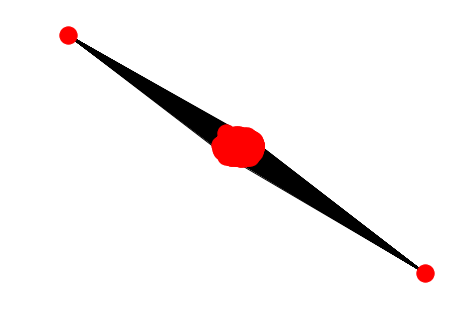

In [23]:
##### apply Spring-force
#######################
pos = nx.spring_layout(G, k = None, dim = 3, scale = 1.0)
nx.draw_spring(G, k = 30, dim = 2, scale = 1.0, iterations =1500)
plt.show()

In [ ]:
##### APPLY community detector
# maximize betweenness and modularity
##################################


In [12]:
##### LOAD IN DATA
###################
# https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns
# 